# Analysis of custom filters

## Aim of this notebook

Analyzing the pre-filtered fragment library, the reduced fragment library and the custom filtered fragment library.


## Table of contents
1. Load the fragment libraries

    1.1. Load fragment library pre-filtered
    
    1.2. Load fragment library reduced
    
    1.3. Load fragment library custom filtered
    
    1.4. Check which fragments from are contained in the subsets
    

2. t-SNE plots
    
    2.1. Comparing fragment library sets
    * Fragment library pre-filtered vs. fragment library reduced
    * Fragment library pre-filtered vs. fragment library custom filtered
    * Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
    
    2.2. Comparing single custom filtering steps



3. Most common fragments per library subset

    3.1. Fragment library pre-filtered

    3.2. Fragment library reduced
    
    3.3. Fragment library custom filtered

    3.4. Compare cluster sizes for all subsets



4. Connection frequency between subpockets

    4.1. Fragment library pre-filtered
    
    4.2. Fragment library reduced
    
    4.3. Fragment library custom filtered
    

5. Fragment similarity per subpocket


6. Fragment properties
    
    6.1. Per subpocket for each set
    
    6.2. Per custom filter

7. Development of number of fragments per subpocket during custom filtering

## Imports and preprocessing

In [1]:
# load specific scikit-learn version to avoid CI fail
!conda install -y scikit-learn=1.0.1

Solving environment: done

## Package Plan ##

  environment location: /home/nona/anaconda3/envs/kinfraglib

  added / updated specs:
    - scikit-learn=1.0.1


The following packages will be UPDATED:

  scikit-learn                        0.24.2-py38ha9443f7_0 --> 1.0.1-py38h51133e4_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: \ 

    Installed package of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install scikit-learn-intelex
        $ python -m sklearnex my_application.py

    

done


In [2]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import filters, utils

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

### Define global paths

In [5]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"
PATH_DATA_CUSTOM = PATH_DATA / "fragment_library_custom_filtered"

## 1. Load the fragment libraries
*  1.1. Load fragment library pre-filtered
*  1.2. Load fragment library reduced
*  1.3. Load fragment library custom filtered
*  1.4. Check which fragments from are contained in the subsets

- **Pre-filtered fragment library:** Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X. `fragment_library`
- **Reduced fragment library:** Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering. `fragment_library_reduced`
- **Custom fragment library:** Pre-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability. `fragment_library_custom_filtered`

### 1.1. Load fragment library pre-filtered
Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X.

In [6]:
fragment_library_orig = utils.read_fragment_library(PATH_DATA / "fragment_library")
fragment_library = filters.prefilters.pre_filters(fragment_library_orig)
pd.concat(fragment_library).shape

(2862, 18)

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]"
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]"
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE]

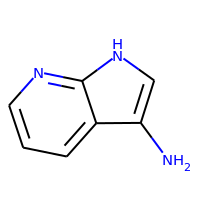
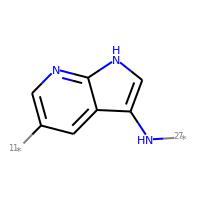
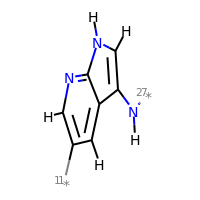
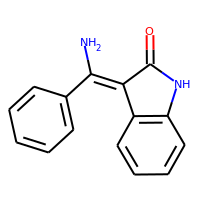
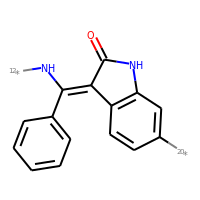
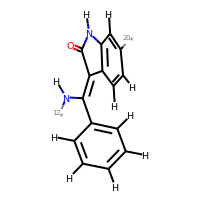
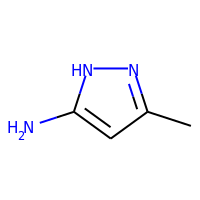
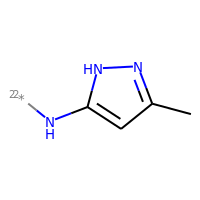
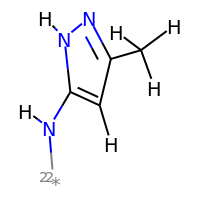

In [7]:
fragment_library['AP'].head(3)

### 1.2. Load fragment library reduced
Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering.

In [8]:
fragment_library_reduced = utils.read_fragment_library(PATH_DATA / "fragment_library_reduced")
pd.concat(fragment_library_reduced).shape

(624, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AKT2,Akt,AGC,3e87,G95,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1cnc2[nH]ccc2c1,*c1ccnc2[nH]ccc12,AP
1,,,,AKT1,Akt,AGC,3ocb,XM1,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 na,c1ncc2cc[nH]c2n1,*c1ncnc2[nH]ccc12,AP
2,,,,JAK1,JakA,TK,4e4l,0NH,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 na,c1cc2c(ncc3nc[nH]c32)[nH]1,*n1cnc2cnc3[nH]ccc3c21,AP

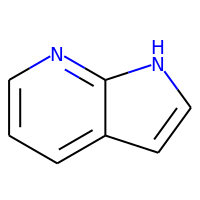
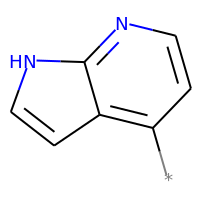
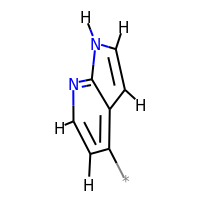
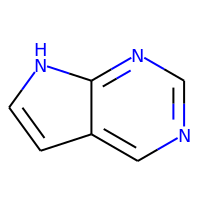
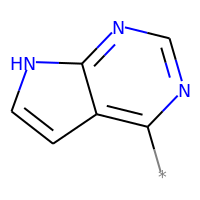
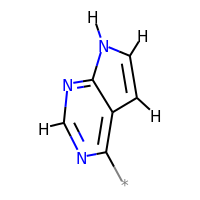
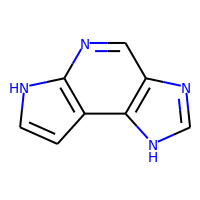
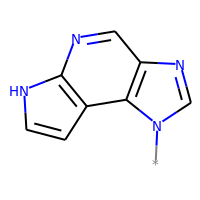
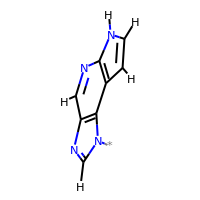

In [9]:
fragment_library_reduced['AP'].head(3)

### 1.3. Load fragment library custom filtered
Pre-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability.

In [10]:
fragment_library_custom = utils.read_fragment_library(PATH_DATA / "fragment_library_custom_filtered")
pd.concat(fragment_library_custom).shape

(388, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,ACTR2,STKR,TKL,3q4t,TAK,A,B,AP AP AP AP AP AP AP AP AP AP AP AP SE GA,16 16 16 16 16 16 16 16 16 16 16 16 na na,c1cnc2ccnn2c1,*c1cnc2c(*)cnn2c1,AP
1,,,,ACTR2,STKR,TKL,3soc,GVD,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,15 15 15 15 15 15 15 15 14 14 14 14 14 14 14 5...,Nc1cc(C2CC2)[nH]n1,*Nc1cc(C2CC2)[nH]n1,AP
2,,,,AKT1,Akt,AGC,3mv5,XFE,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,16 16 16 16 16 16 16 16 16 16 16 16 8 8 8 8 na,Cc1c[nH]c2ncncc12,*c1ncnc2[nH]cc(C)c12,AP

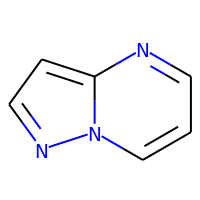
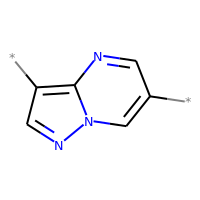
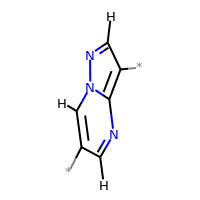
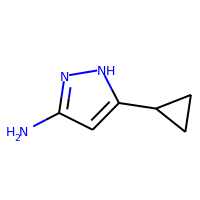
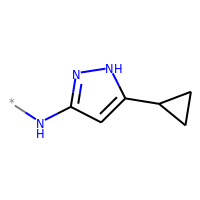
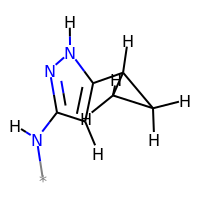
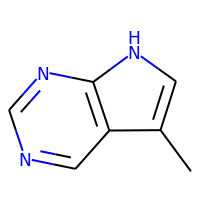
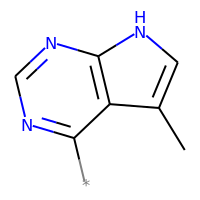
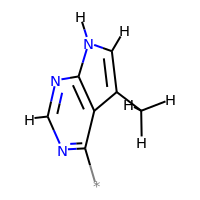

In [11]:
fragment_library_custom['AP'].head(3)

### 1.4. Check which fragments from are contained in the subsets

In [12]:
fragment_library = filters.analysis.frag_in_subset(fragment_library, fragment_library_reduced, colname = "bool_reduced")

In [13]:
fragment_library = filters.analysis.frag_in_subset(fragment_library, fragment_library_custom, colname = "bool_custom")

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name,bool_reduced,bool_custom
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]",0,0
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]",0,0
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE],1,0

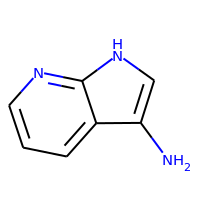
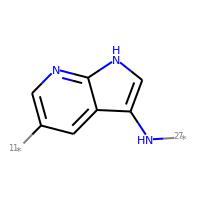
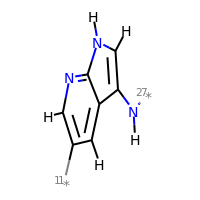
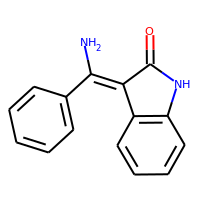
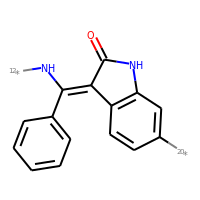
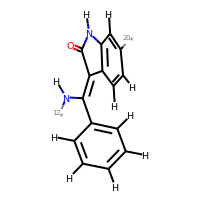
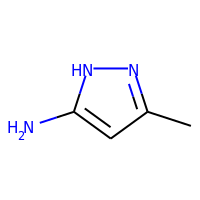
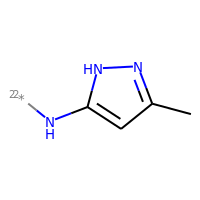
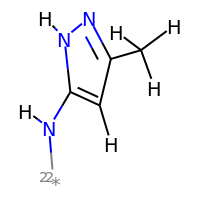

In [14]:
fragment_library["AP"].head(3)

Number of fragments per subset

In [15]:
num_fragments = pd.concat(
    [
        filters.analysis.count_fragments(fragment_library, "pre-filtered"),
        filters.analysis.count_fragments(fragment_library_reduced, "reduced"),
        filters.analysis.count_fragments(fragment_library_custom, "custom"),
    ],
    axis=1,
)
num_fragments.append(num_fragments.sum().rename("Total"))

,pre-filtered,reduced,custom
subpocket,,,
AP,1001,145,107
FP,864,192,97
SE,607,140,95
GA,306,93,79
B1,42,24,5
B2,42,30,5
Total,2862,624,388


## 2. t-SNE plots
* 2.1. Comparing fragment library sets
        - Fragment library pre-filtered vs. fragment library reduced
        - Fragment library pre-filtered vs. fragment library custom filtered
        - Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
* 2.2. Comparing single custom filtering steps

T-Distributed Stochastic Neighbor Embedding (t-SNE) plots can be used to visualize high dimensional data in a low dimensional space, showing clusters. 

We will use them to compare the included and excluded fragments in the fragment libraries and the filtering steps

### 2.1. Comparing fragment library sets

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


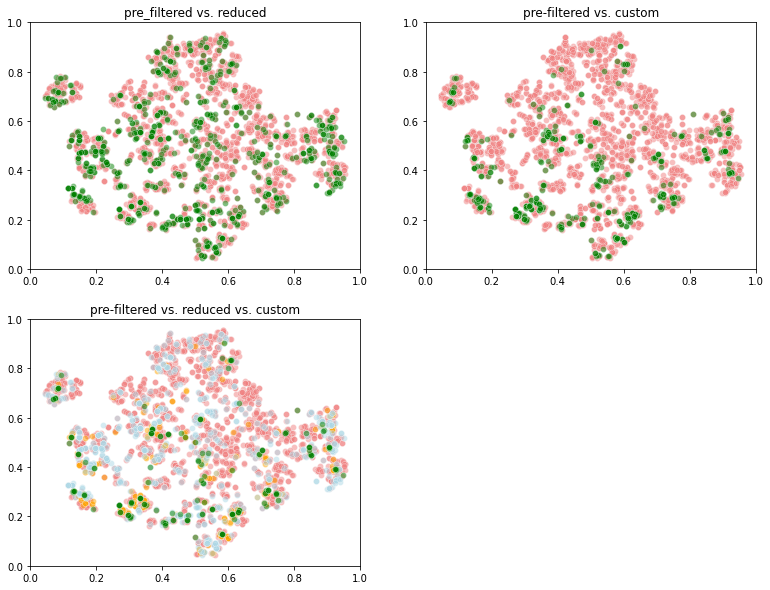

2862 Pre-filtered fragments.
        Number of fragments excluded in both datasets: 1859
        Number of fragments excluded in the reduced dataset but included in the custom dataset: 226
        Number of fragments excluded in the custom dataset but included in the reduced dataset: 605
        Number of fragments in both datasets: 172 


In [16]:
filters.plots.create_tsne_plots(fragment_library)

### 2.2 Comparing single custom filtering steps

Read in file where single filtering step results are saved

In [17]:
saved_filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
saved_filter_results.head()

,smiles,subpocket,bool_pains,bool_brenk,bool_ro3,bool_qed,qed,bool_bb,bool_syba,syba,retro_count,bool_retro
0,Nc1c[nH]c2ncccc12,AP,1,1,1,1,0.565900,1,1,30.950959,0.0,0.0
1,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,AP,1,0,1,1,0.747185,0,1,17.682659,NaN,NaN
2,Cc1cc(N)[nH]n1,AP,1,1,1,0,0.488854,1,1,15.727015,NaN,NaN
3,Nc1ncc(C=O)s1,AP,1,0,1,1,0.561340,1,1,12.789242,NaN,NaN
4,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,AP,1,0,0,1,0.723961,0,1,14.653939,NaN,NaN


[describe tsne plots]

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


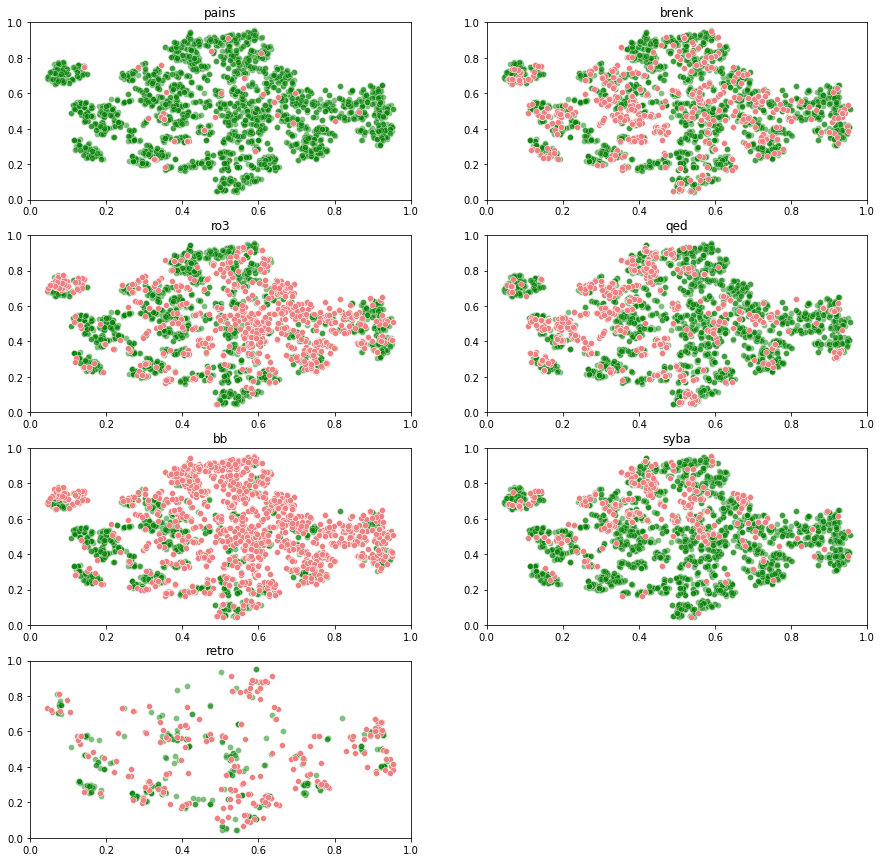

In [18]:
filters.plots.create_tsne_plots_filters(fragment_library, saved_filter_results)

## 3. Most common fragments per library subset
* 3.1. Fragment library pre-filtered
* 3.2. Fragment library reduced
* 3.3. Fragment library custom filtered
* 3.4. Compare cluster sizes for all subsets

In [19]:
subpocket = "all"

### 3.1. Fragment library pre-filtered

In [20]:
most_common_fragments = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library)

Number of molecules: 2862
Threshold:  0.6
Number of clusters:  453
# Clusters with only 1 molecule:  197
# Clusters with more than 5 molecules:  105
# Clusters with more than 25 molecules:  24
# Clusters with more than 100 molecules:  4


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


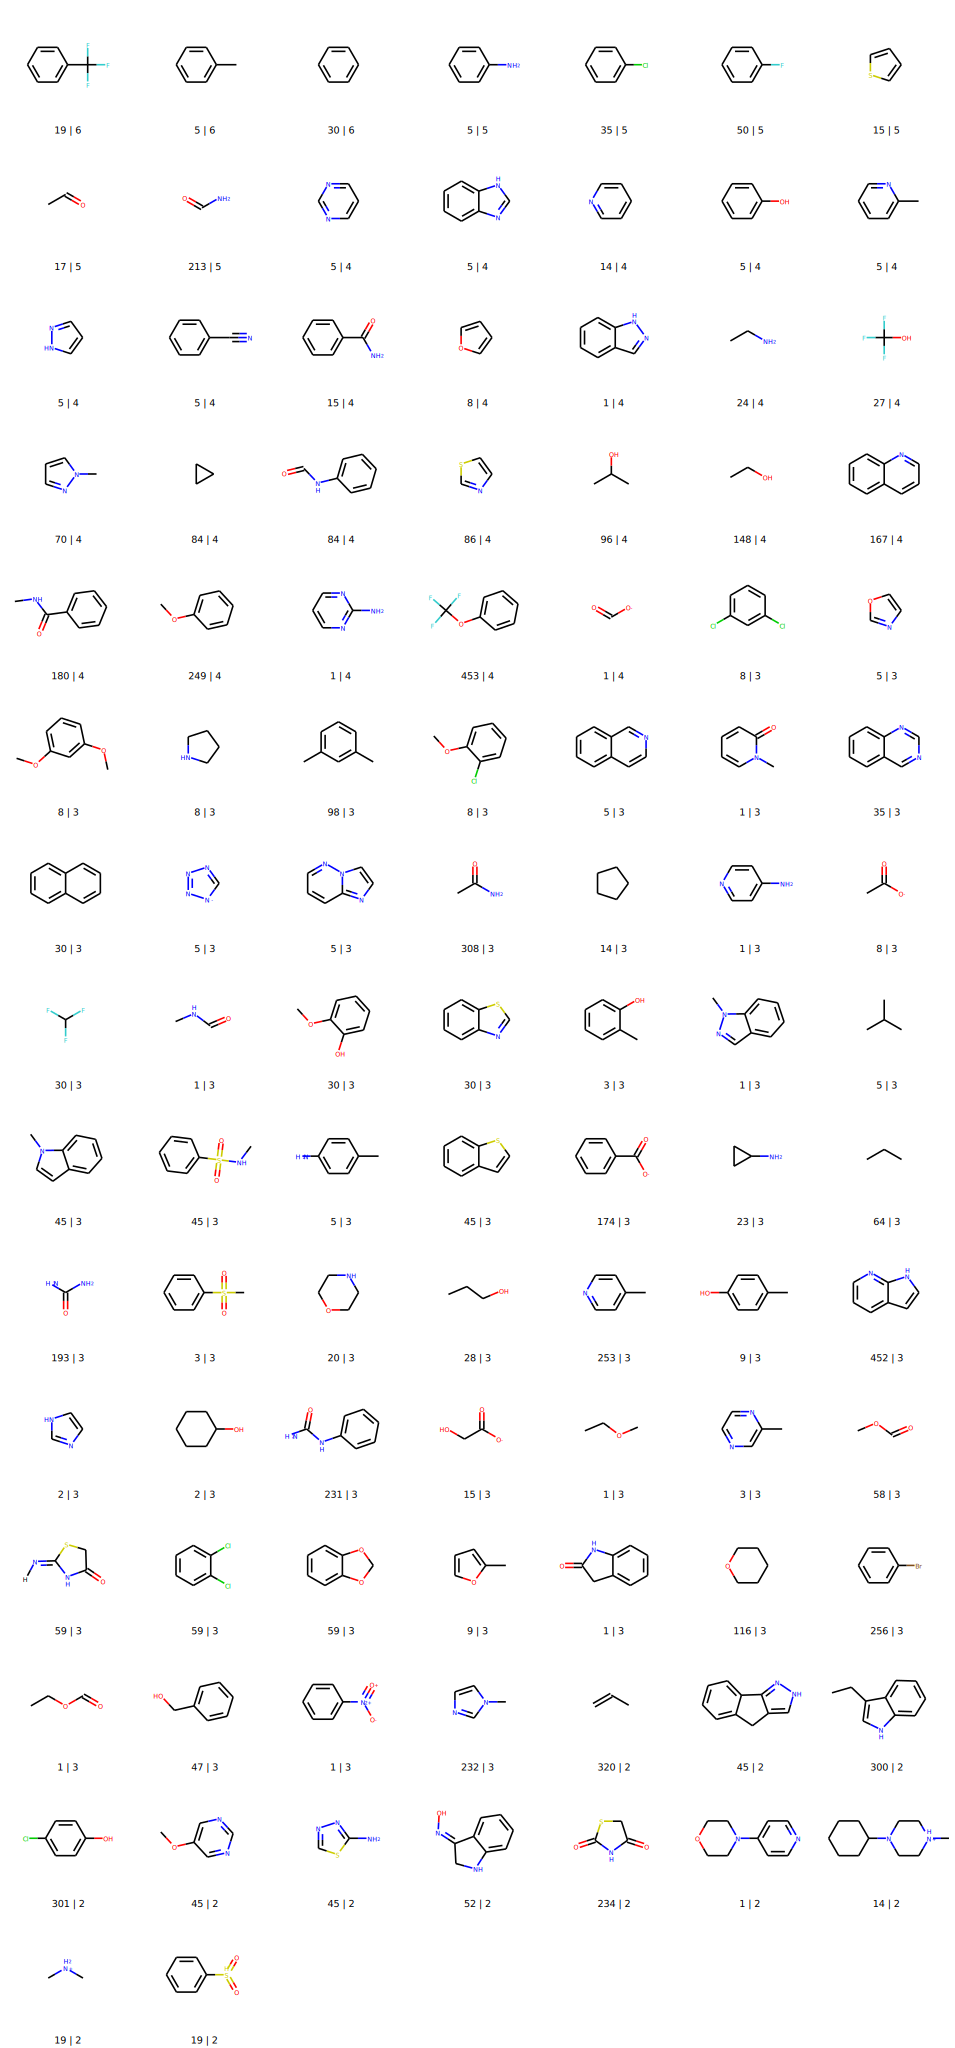

In [21]:
filters.pipeline_analysis.draw_clusters(most_common_fragments)

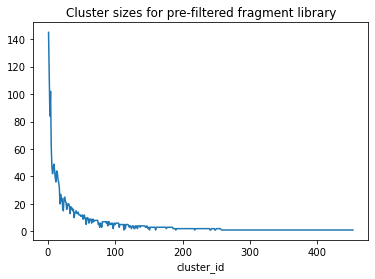

In [22]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments, "all", "pre-filtered fragment library")

In [23]:
# add information in which subpocket the fragments occour
subpockets = []
for smiles in most_common_fragments["smiles"]:
    subpocket_lst = []
    for subpocket in fragment_library.keys():
        if not fragment_library[subpocket][fragment_library[subpocket]["smiles"]==smiles].empty:
            subpocket_lst.append(subpocket)
    subpockets.append(subpocket_lst)
    
most_common_fragments["subpockets"] = subpockets

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
0,17,c1ccc2[nH]ncc2c1,4,,1,2,"[AP, FP, SE, GA]"
1,19,Nc1ncccn1,4,,1,3,"[AP, FP, SE, GA]"
2,26,O=C[O-],4,,1,4,"[AP, FP, SE, GA]"

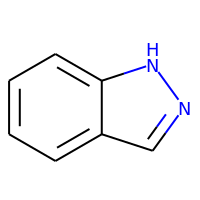
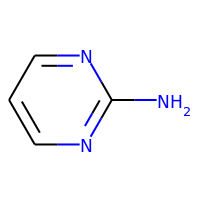
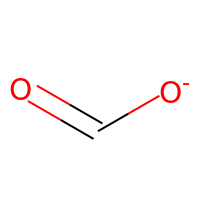

In [24]:
most_common_fragments.head(3)

Are there fragments appearing in all 6 subpockets?

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
446,0,Cc1ccccc1,6,,5,2,"[AP, FP, SE, GA, B1, B2]"
1025,1,FC(F)(F)c1ccccc1,6,,19,2,"[AP, FP, SE, GA, B1, B2]"
1258,2,c1ccccc1,6,,30,2,"[AP, FP, SE, GA, B1, B2]"

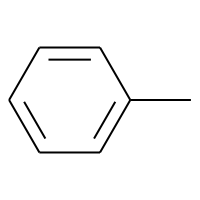
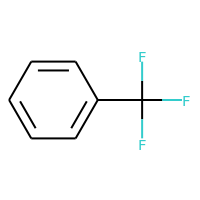
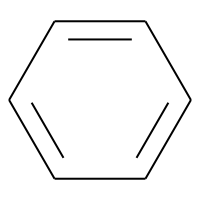

In [25]:
most_common_fragments[most_common_fragments["fragment_count"]==6]

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
18,228,CCN(C)C=O,1,,1,20,[GA]
19,233,NCCc1ccccc1,1,,1,21,[FP]
20,234,CC1(C)Cc2ccccc2O1,1,,1,22,[SE]
21,241,OC[C@@H]1CCCCO1,1,,1,23,[FP]
22,249,CCc1cnc2ccn(S(=O)(=O)c3c[nH]cn3)c2n1,1,,1,24,[AP]

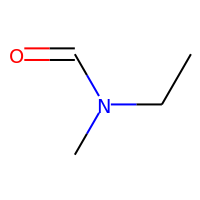
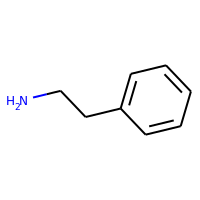
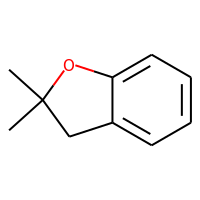
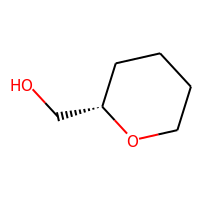
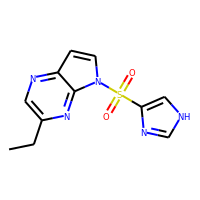

In [26]:
most_common_fragments[most_common_fragments["fragment_count"]==min(most_common_fragments["fragment_count"])].head()

### 3.2. Fragment library reduced

In [27]:
most_common_fragments_reduced = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library_reduced)

Number of molecules: 624
Threshold:  0.6
Number of clusters:  262
# Clusters with only 1 molecule:  168
# Clusters with more than 5 molecules:  24
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


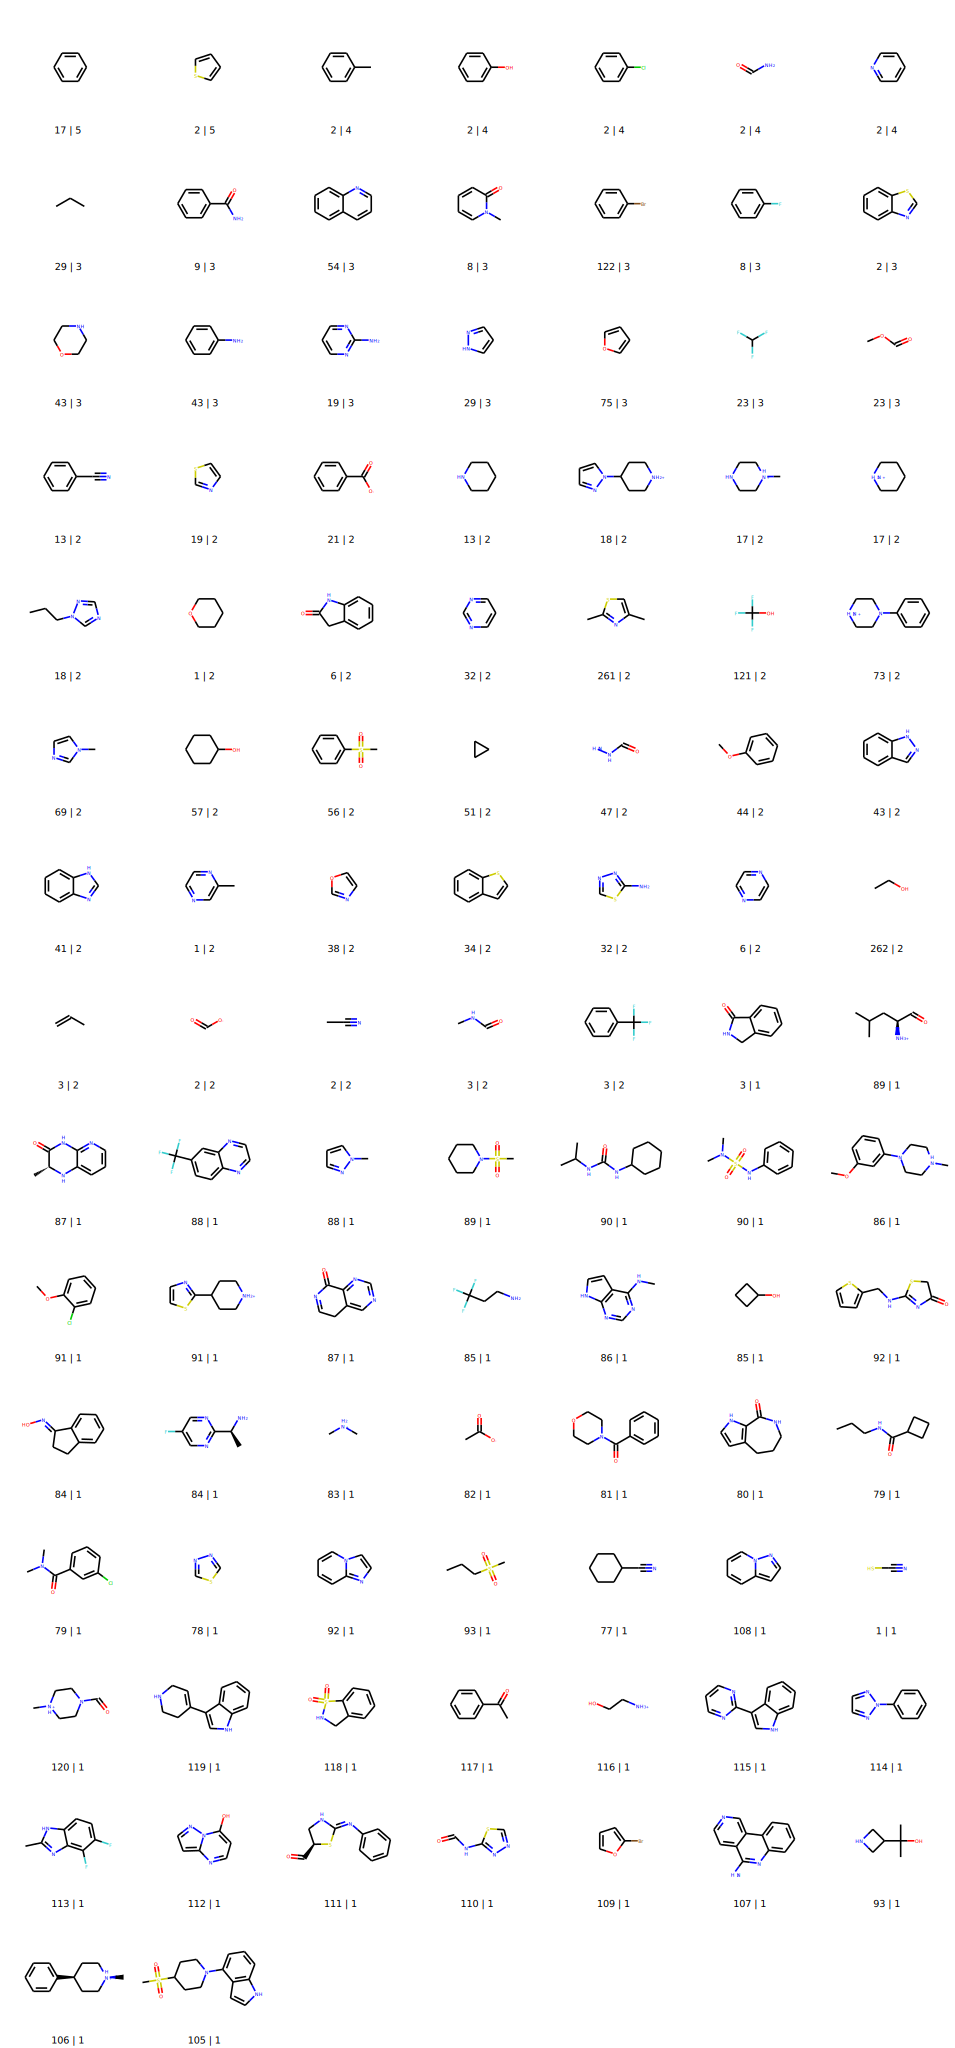

In [28]:
filters.pipeline_analysis.draw_clusters(most_common_fragments_reduced)

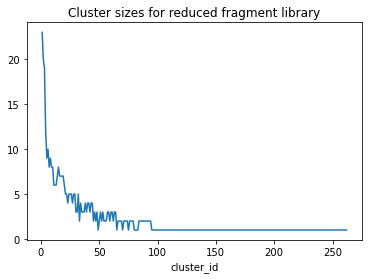

In [29]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments_reduced, "all", "reduced fragment library")

In [30]:
# add information in which subpocket the fragments occour
subpockets = []
for smiles in most_common_fragments_reduced["smiles"]:
    subpocket_lst = []
    for subpocket in fragment_library_reduced.keys():
        if not fragment_library_reduced[subpocket][fragment_library_reduced[subpocket]["smiles"]==smiles].empty:
            subpocket_lst.append(subpocket)
    subpockets.append(subpocket_lst)
    
most_common_fragments_reduced["subpockets"] = subpockets

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
0,32,C1CCOCC1,2,,1,2,"[SE, GA]"
1,50,Cc1cnccn1,2,,1,3,"[SE, B1]"
2,86,CCCNC(=O)c1cccs1,1,,1,4,[FP]

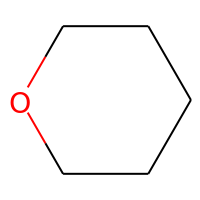
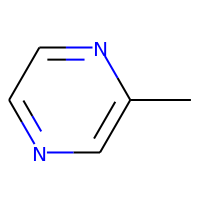
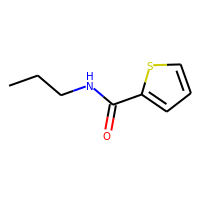

In [31]:
most_common_fragments_reduced.head(3)

Are there fragments appearing in all 6 subpockets?

In [32]:
most_common_fragments_reduced[most_common_fragments_reduced["fragment_count"]==6]

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets


,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
2,86,CCCNC(=O)c1cccs1,1,,1,4,[FP]
3,108,c1cnc2ccnn2c1,1,,1,5,[AP]
4,152,N#CS,1,,1,6,[GA]
5,155,CCCC=O,1,,1,7,[SE]
6,160,On1ccc2ncccc21,1,,1,8,[FP]
...,...,...,...,...,...,...,...
533,69,CC(C)S(=O)(=O)c1ccn(C)n1,1,,256,1,[FP]
534,67,O=CNc1n[nH]c2ccsc12,1,,257,1,[AP]
535,61,CC(C)(CO)S(C)(=O)=O,1,,258,1,[FP]
536,59,NC(=O)c1ccc[nH]1,1,,259,1,[GA]

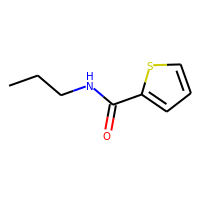
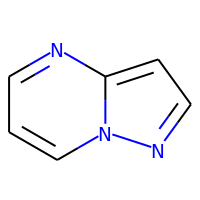
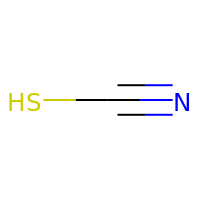
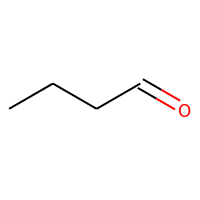
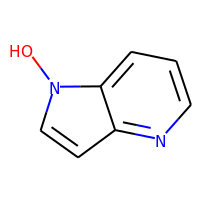
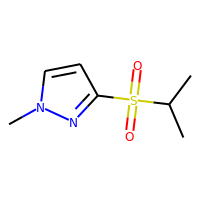
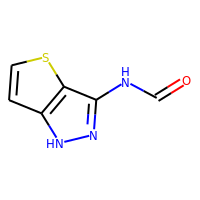
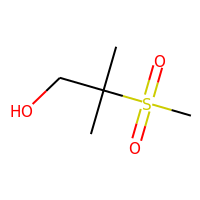
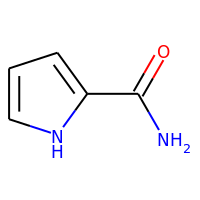
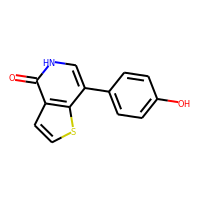

In [33]:
most_common_fragments_reduced[most_common_fragments_reduced["fragment_count"]==min(most_common_fragments_reduced["fragment_count"])]

### 3.3. Fragment library custom filtered

In [34]:
most_common_fragments_custom = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library_custom)

Number of molecules: 388
Threshold:  0.6
Number of clusters:  76
# Clusters with only 1 molecule:  33
# Clusters with more than 5 molecules:  16
# Clusters with more than 25 molecules:  3
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


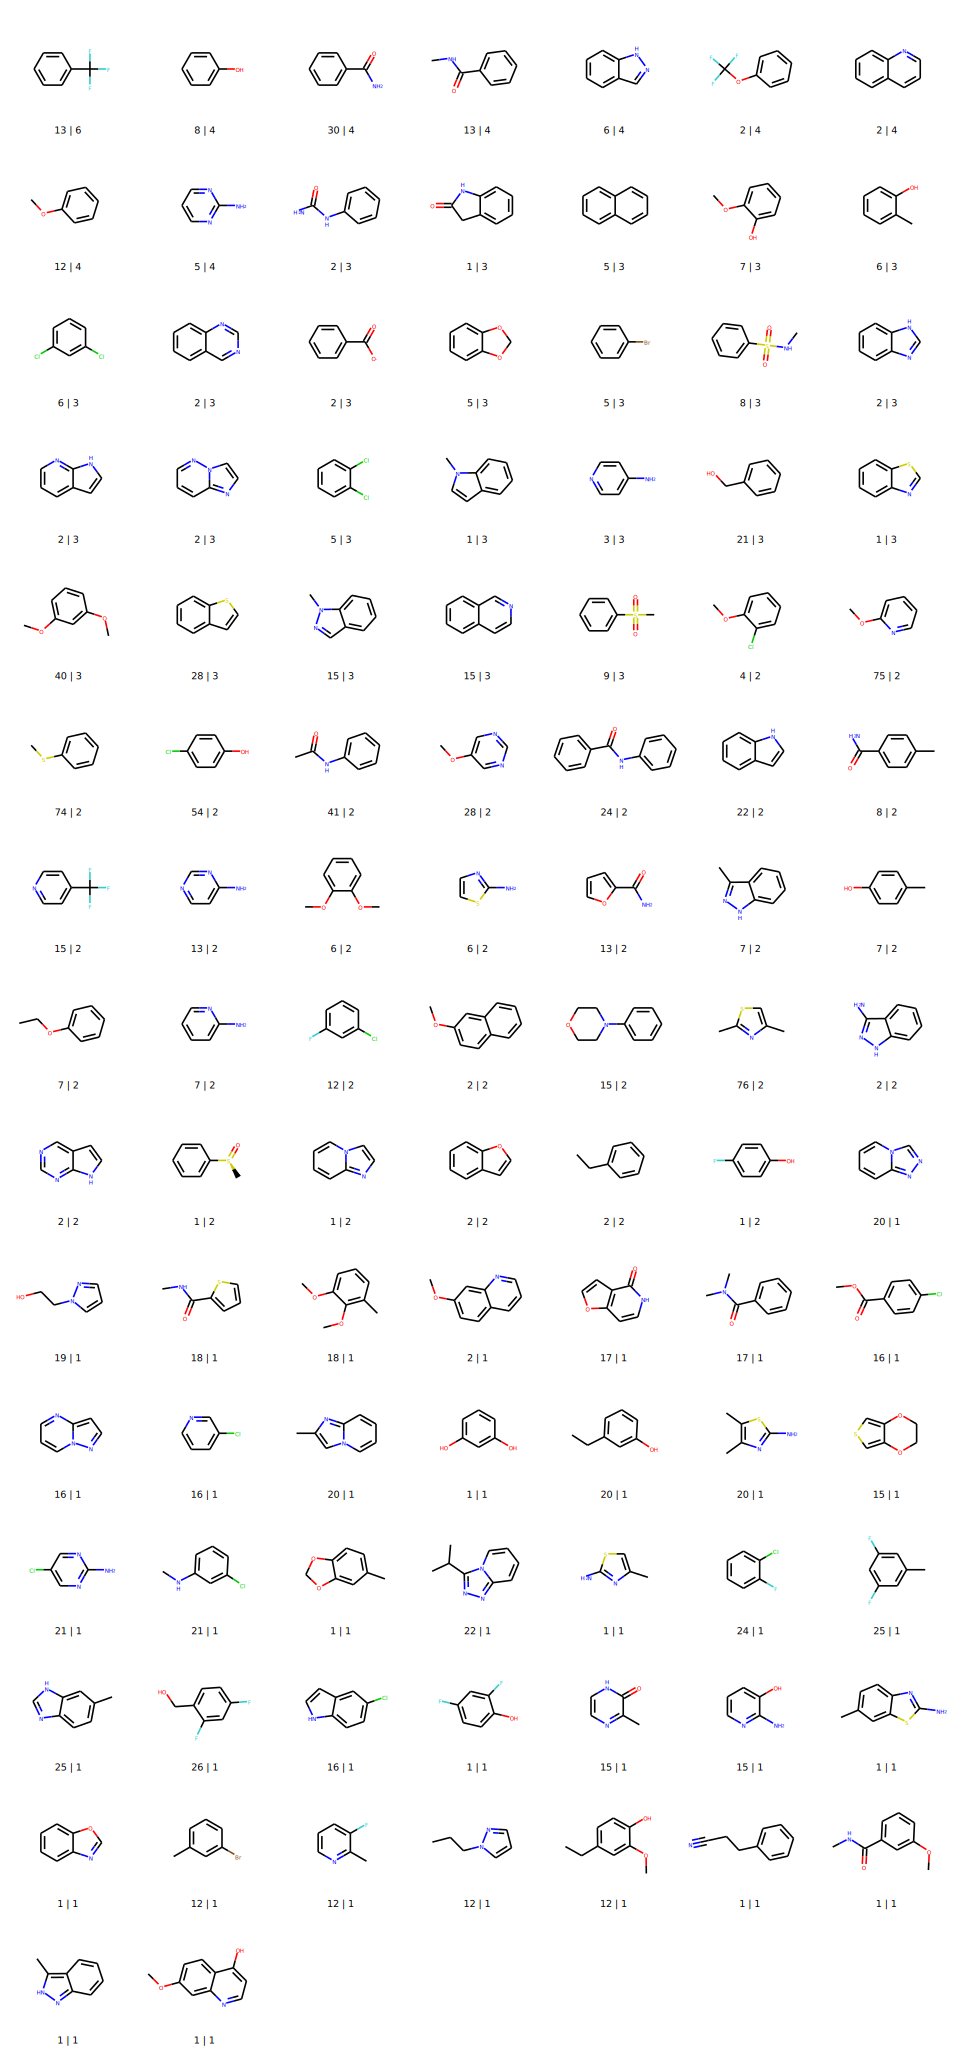

In [35]:
filters.pipeline_analysis.draw_clusters(most_common_fragments_custom)

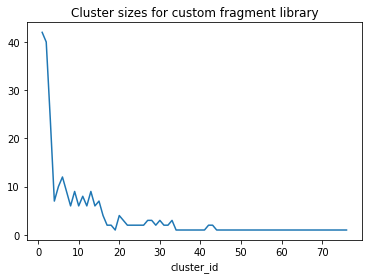

In [36]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments_custom, "all", "custom fragment library")

In [37]:
# add information in which subpocket the fragments occour
subpockets = []
for smiles in most_common_fragments_custom["smiles"]:
    subpocket_lst = []
    for subpocket in fragment_library_custom.keys():
        if not fragment_library_custom[subpocket][fragment_library_custom[subpocket]["smiles"]==smiles].empty:
            subpocket_lst.append(subpocket)
    subpockets.append(subpocket_lst)
    
most_common_fragments_custom["subpockets"] = subpockets

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
0,14,Cn1ccc2ccccc21,3,,1,2,"[FP, SE, B2]"
1,15,O=C1Cc2ccccc2N1,3,,1,3,"[AP, SE, GA]"
2,16,c1ccc2scnc2c1,3,,1,4,"[AP, FP, GA]"

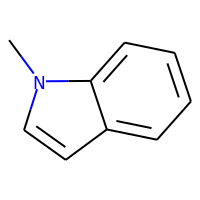
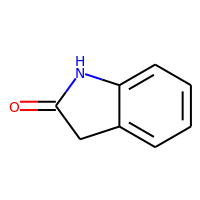
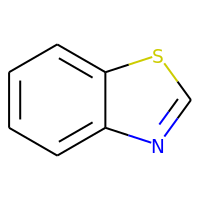

In [38]:
most_common_fragments_custom.head(3)

Are there fragments appearing in all 6 subpockets?

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
179,0,FC(F)(F)c1ccccc1,6,,13,2,"[AP, FP, SE, GA, B1, B2]"

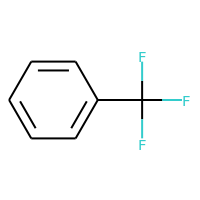

In [39]:
most_common_fragments_custom[most_common_fragments_custom["fragment_count"]==6]

,molecule_id,smiles,fragment_count,ROMol,cluster_id,cluster_member_id,subpockets
6,78,Cc1cc(N)sn1,1,,1,8,[SE]
7,85,NC(=O)c1ccoc1,1,,1,9,[AP]
8,89,Cc1ccccc1C(N)=O,1,,1,10,[GA]
9,93,c1cc(N2CCOCC2)ccn1,1,,1,11,[SE]
10,108,CNC(=O)c1ccc(OC)cc1,1,,1,12,[SE]
...,...,...,...,...,...,...,...
274,109,c1ccc(-n2nccn2)cc1,1,,69,1,[SE]
275,99,COc1cccc(C(N)=O)c1,1,,70,1,[SE]
276,70,Oc1cnccn1,1,,71,1,[AP]
277,68,OCCc1c[nH]cn1,1,,72,1,[FP]

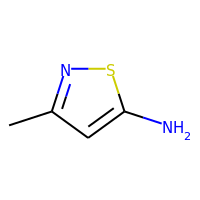
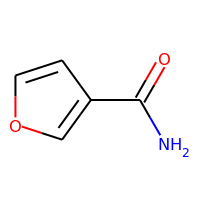
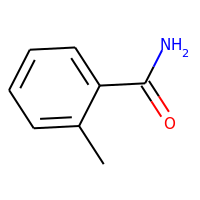
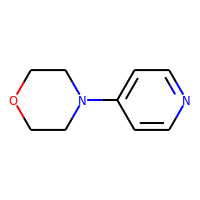
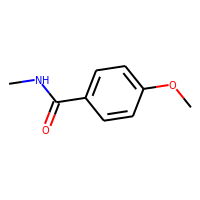
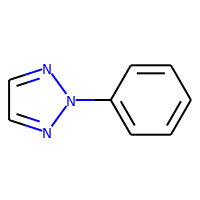
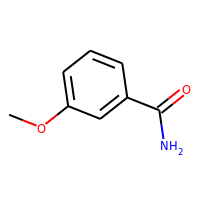
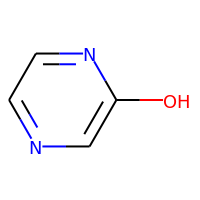
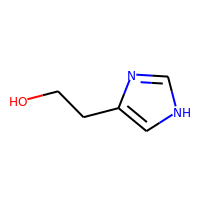
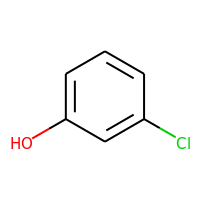

In [40]:
most_common_fragments_custom[most_common_fragments_custom["fragment_count"]==min(most_common_fragments_custom["fragment_count"])]

### 3.4. Compare cluster sizes for all subsets

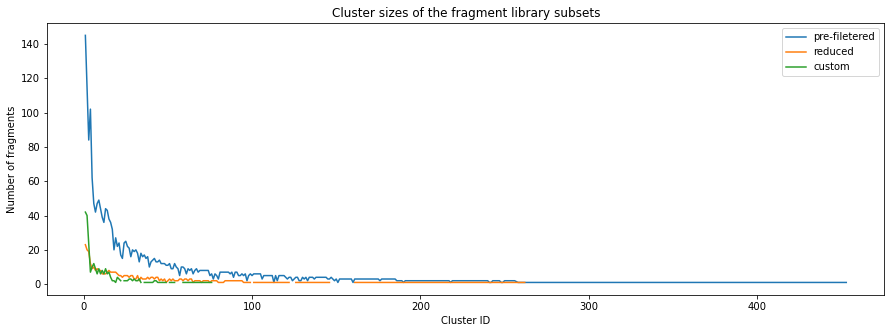

In [41]:
cluster_sizes = pd.DataFrame()
cluster_sizes["pre-filetered"] = most_common_fragments.groupby('cluster_id').size()
cluster_sizes["pre-filetered"].name = 'cluster_size'
cluster_sizes["reduced"] = most_common_fragments_reduced.groupby('cluster_id').size()
cluster_sizes["reduced"].name = "cluster_size"
cluster_sizes["custom"] = most_common_fragments_custom.groupby('cluster_id').size()
cluster_sizes["custom"].name = "cluster_size"

plt = cluster_sizes.plot(
    figsize=(15,5),
    title="Cluster sizes of the fragment library subsets",
    ylabel="Number of fragments",
    xlabel="Cluster ID"
)

## 4. Connection frequecy between subpockets

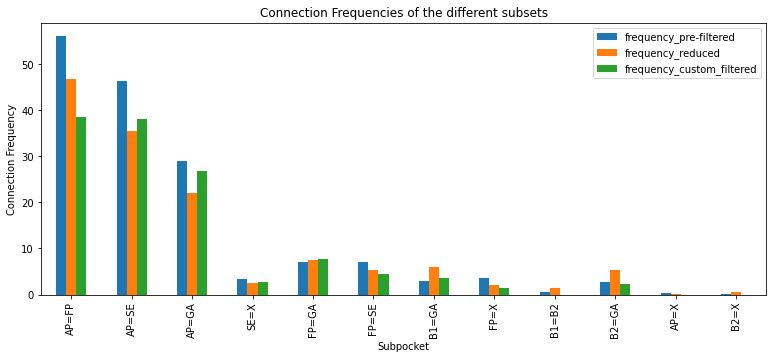

In [42]:
con_frequencies = filters.plots.connection_frequencies(fragment_library, fragment_library_reduced, fragment_library_custom)

In [43]:
con_frequencies

,count_pre-filtered,frequency_pre-filtered,count_reduced,frequency_reduced,count_custom-filtered,frequency_custom_filtered
AP=FP,1026,56.2,254,46.9,140,38.5
AP=SE,848,46.4,193,35.6,139,38.2
AP=GA,528,28.9,120,22.1,98,26.9
SE=X,63,3.4,13,2.4,10,2.7
FP=GA,129,7.1,41,7.6,28,7.7
FP=SE,128,7.0,29,5.4,16,4.4
B1=GA,54,3.0,32,5.9,13,3.6
FP=X,68,3.7,11,2.0,5,1.4
B1=B2,9,0.5,8,1.5,0,0.0
B2=GA,49,2.7,29,5.4,8,2.2


## 5. Fragment similarity per subpocket


In [44]:
similarities_per_subpocket = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library))
similarities_per_subpocket_reduced = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_reduced))
similarities_per_subpocket_custom = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_custom))
mean_similarities = pd.concat(
    [
        similarities_per_subpocket.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_reduced.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_custom.groupby('subpocket', sort=False).mean(),
    ],
    axis=1,
)
mean_similarities.columns=["similarity_pre-filtered", "similarity_reduced", "similarity_custom"]
mean_similarities

,similarity_pre-filtered,similarity_reduced,similarity_custom
subpocket,,,
AP,0.140770,0.111311,0.161415
FP,0.089188,0.069282,0.129486
SE,0.102719,0.076425,0.144180
GA,0.104821,0.075186,0.166848
B1,0.074256,0.052510,0.143353
B2,0.091785,0.073320,0.149357


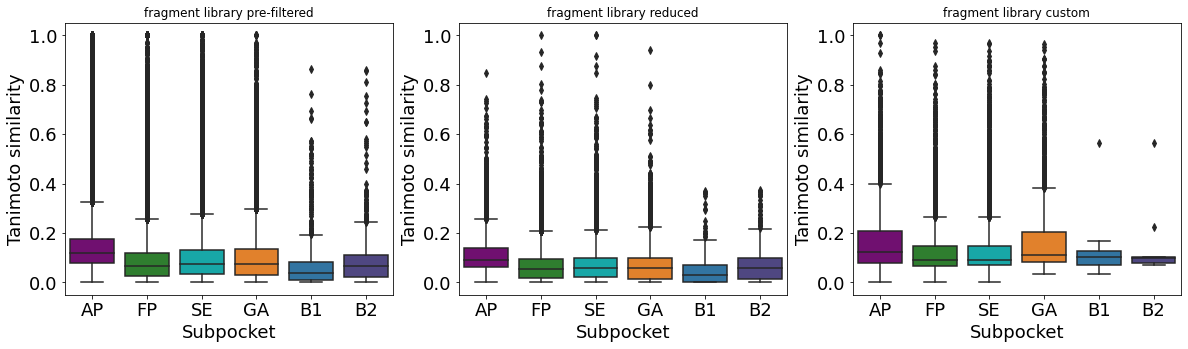

In [45]:
filters.pipeline_analysis.plot_fragment_similarity(
    [similarities_per_subpocket,
     similarities_per_subpocket_reduced,
     similarities_per_subpocket_custom],
    ["fragment library pre-filtered",
    "fragment library reduced",
    "fragment library custom"],
    'Subpocket'
)

## 6. Fragment properties 
* 6.1. Per subpocket for each set
* 6.2. Per custom filter

### 6.1. Per subpocket for each set 

 fragment library pre-filtered 


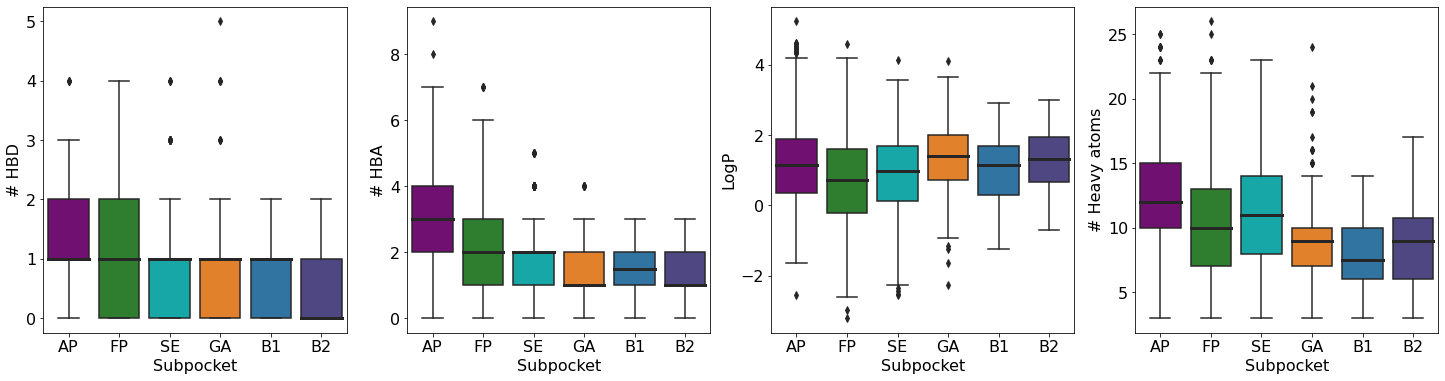

 fragment  library reduced 


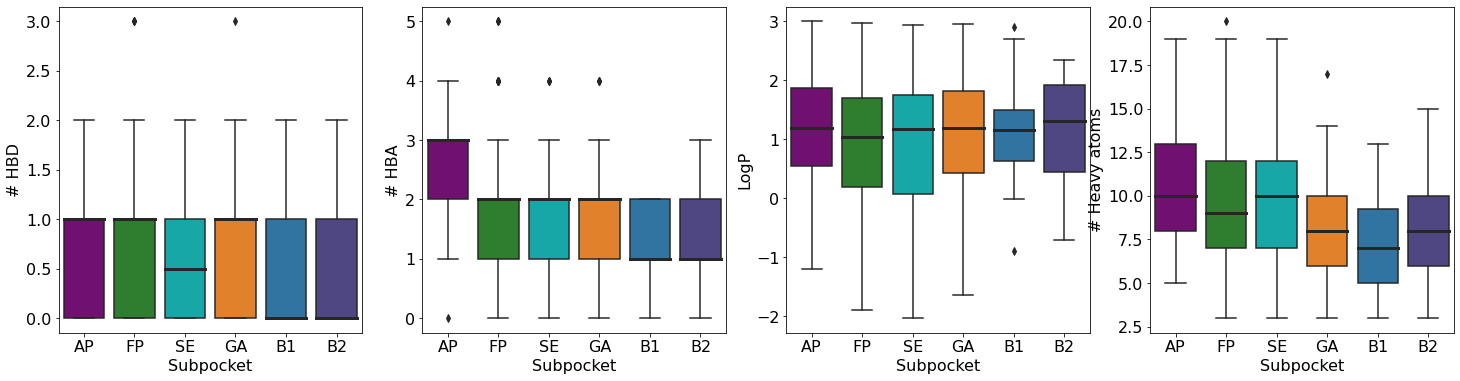

 fragment library custom 


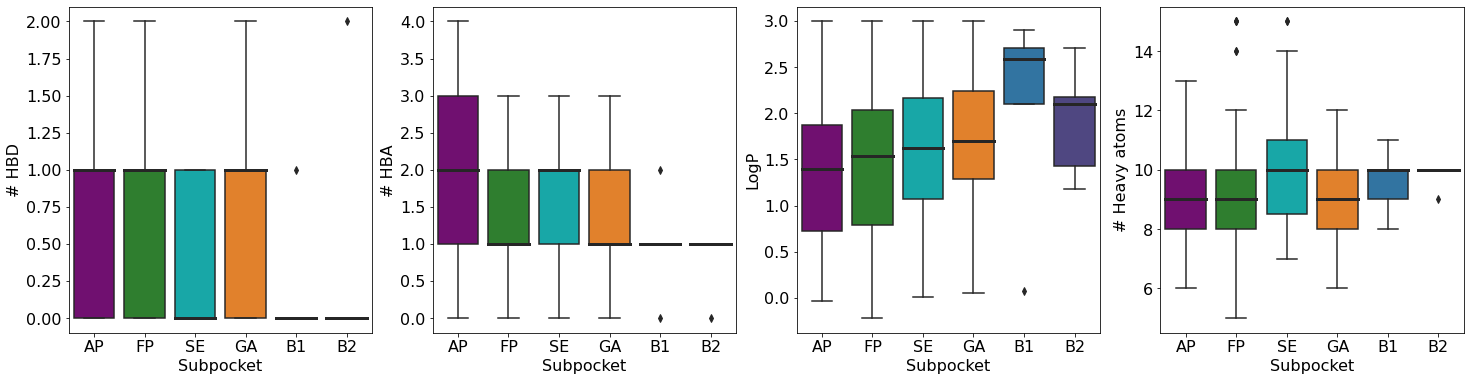

In [46]:
filters.analysis.get_descriptors(fragment_library, fragment_library_reduced, fragment_library_custom)

### 6.2. Per custom filter

In [47]:
filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
fragment_library_filter_res, bool_keys = filters.analysis.filter_res_in_fraglib(fragment_library, filter_results)

 pre-filtered 


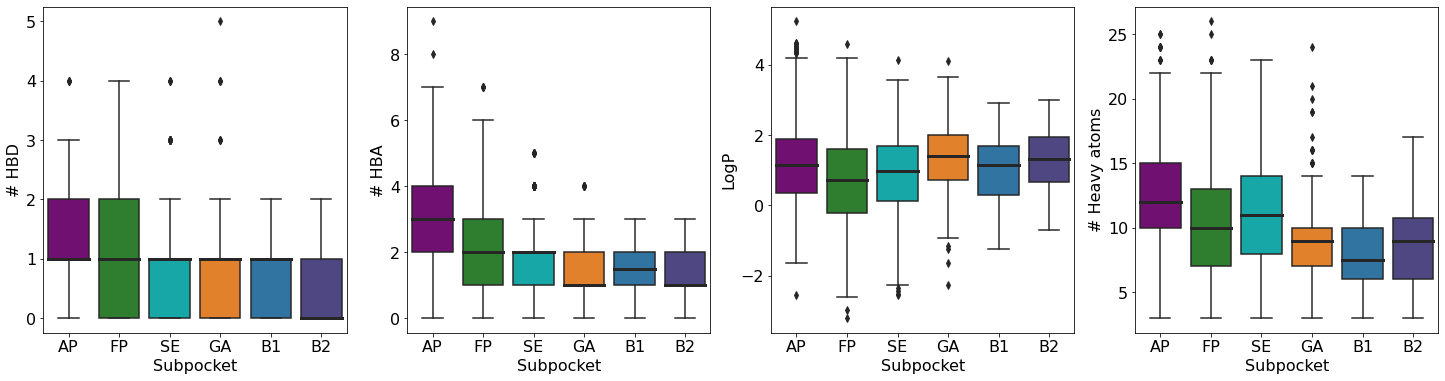

 bool_reduced 


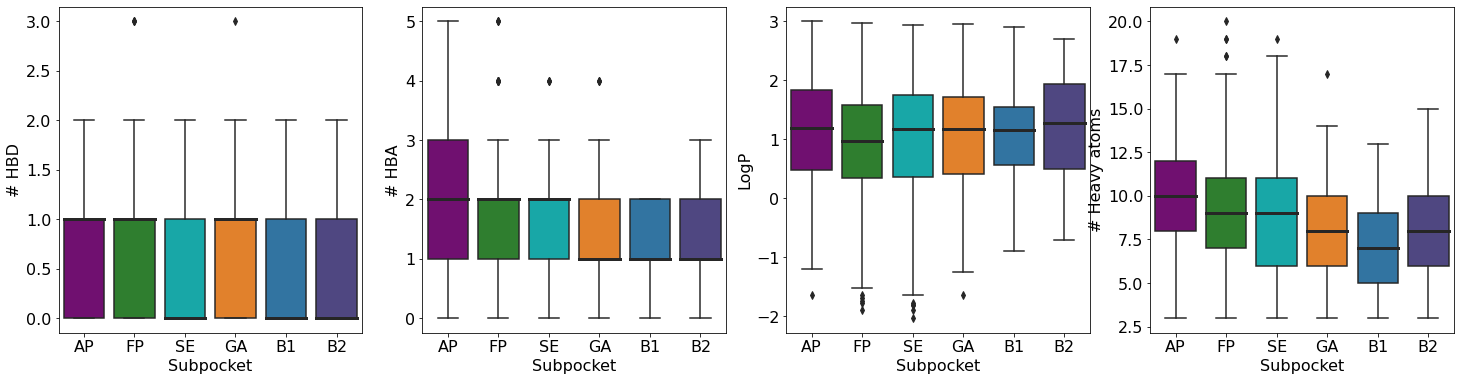

 bool_custom 


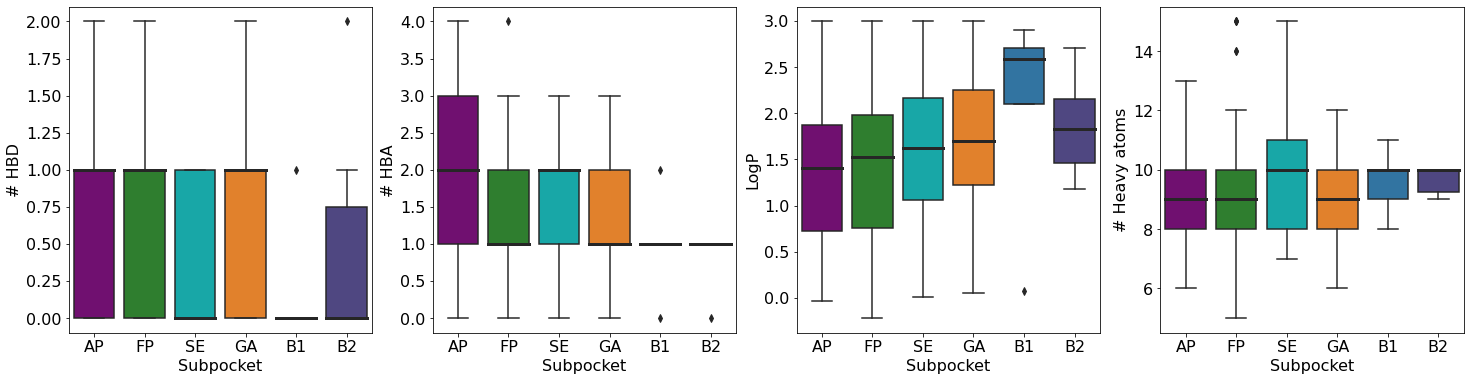

 bool_pains 


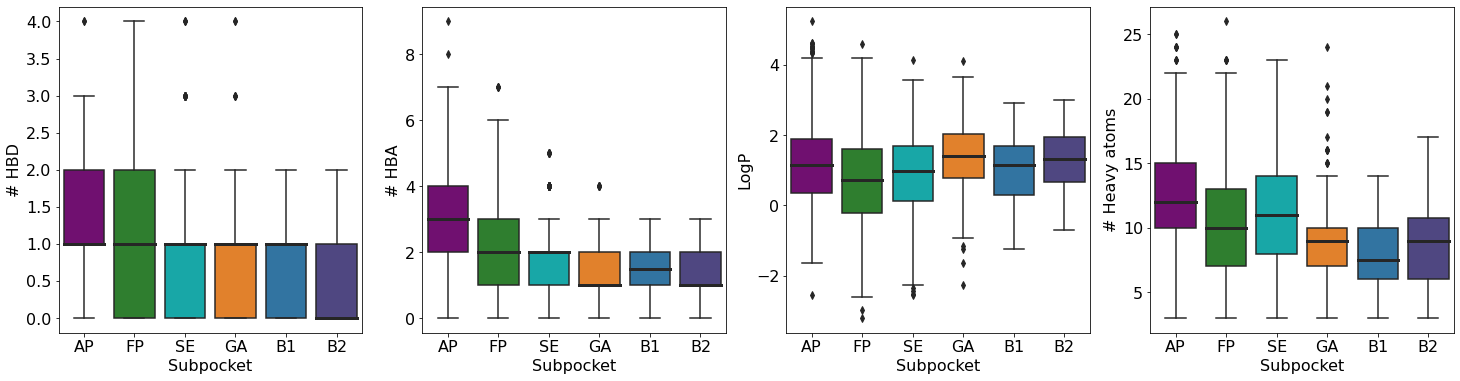

 bool_brenk 


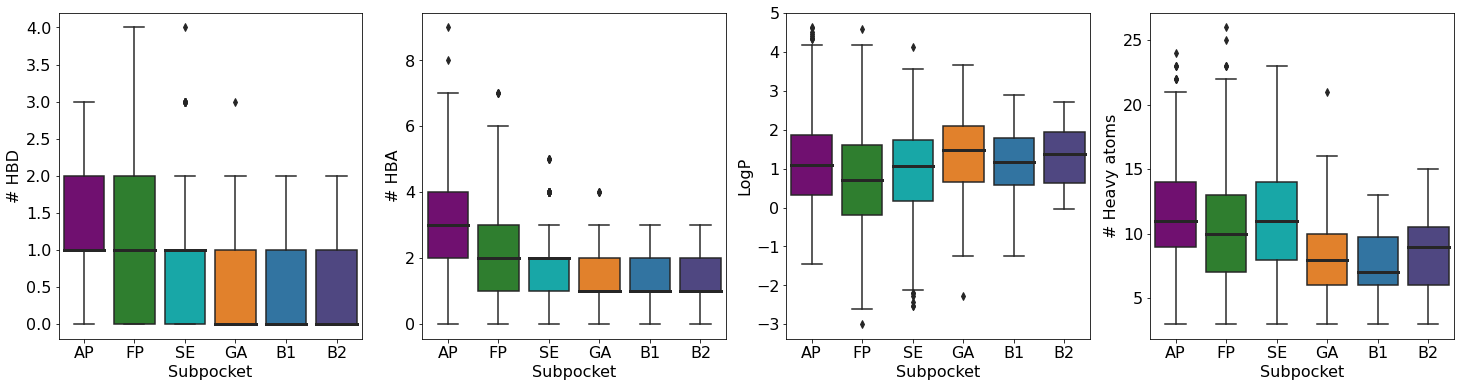

 bool_ro3 


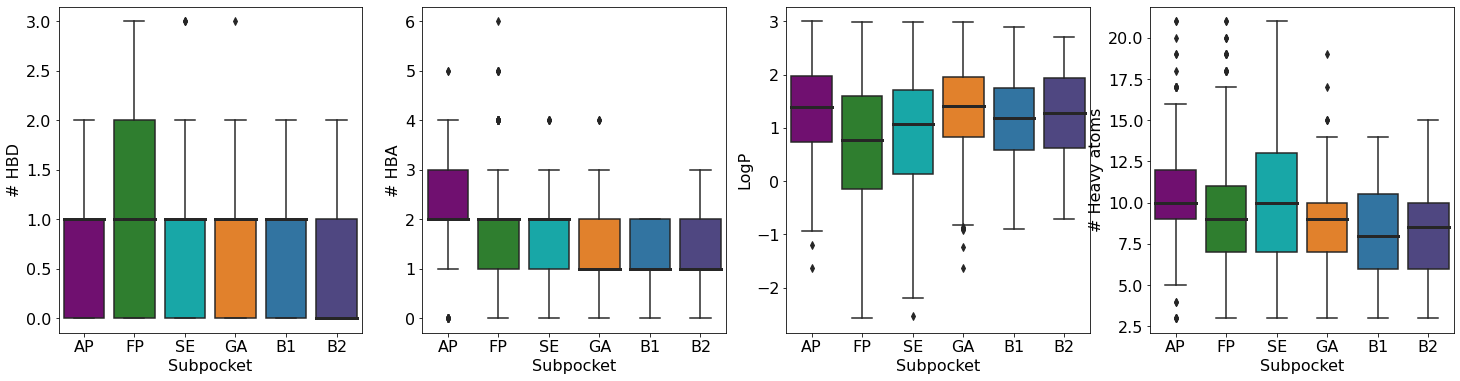

 bool_qed 


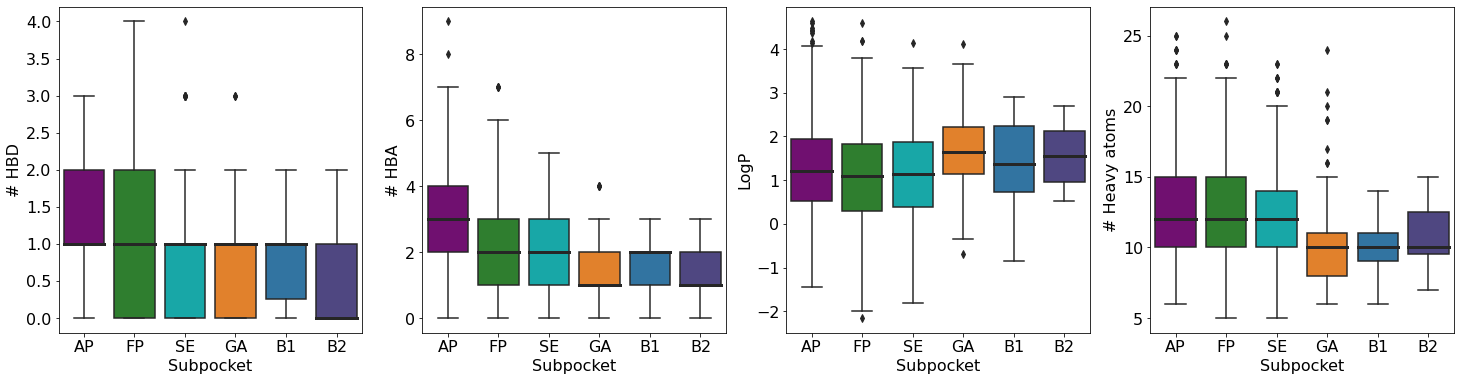

 bool_bb 


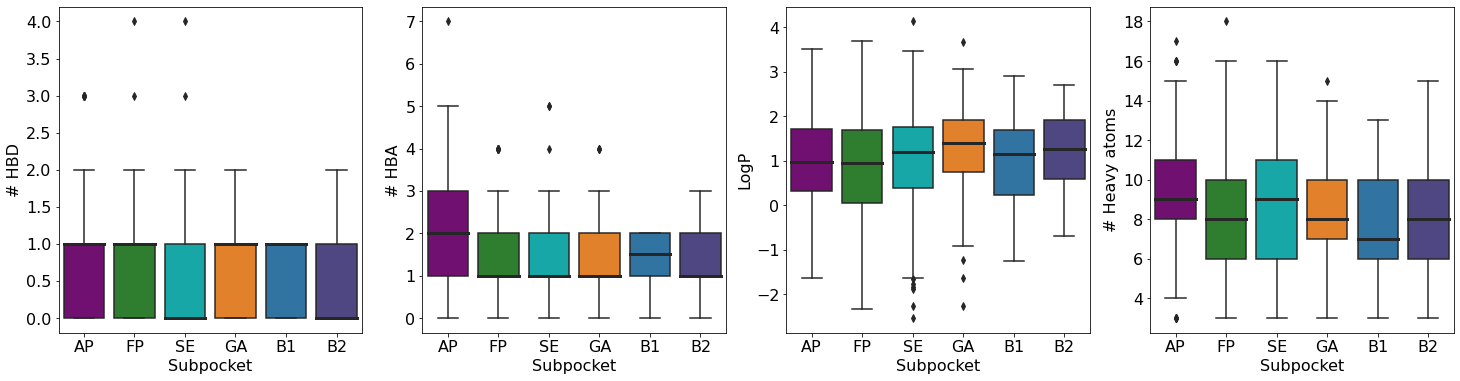

 bool_syba 


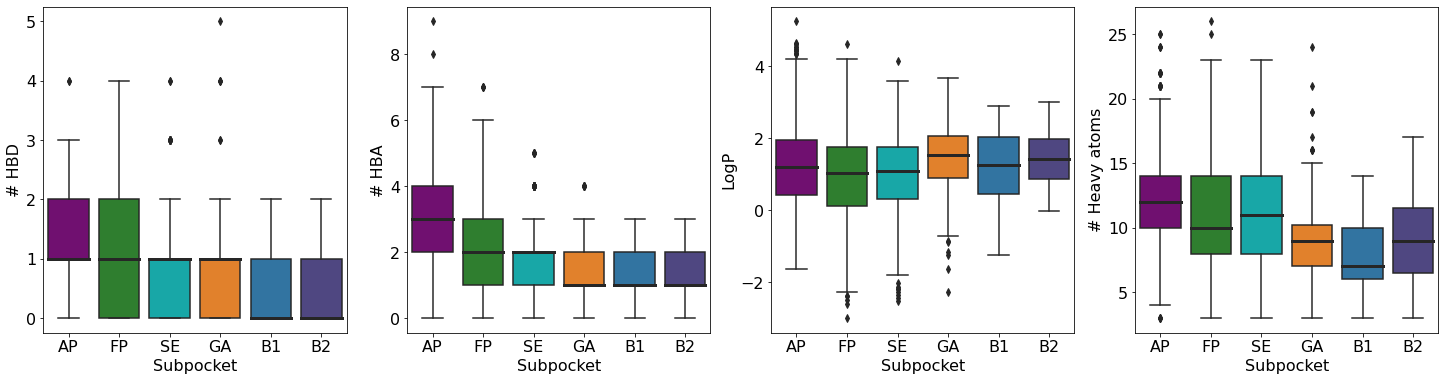

 bool_retro 


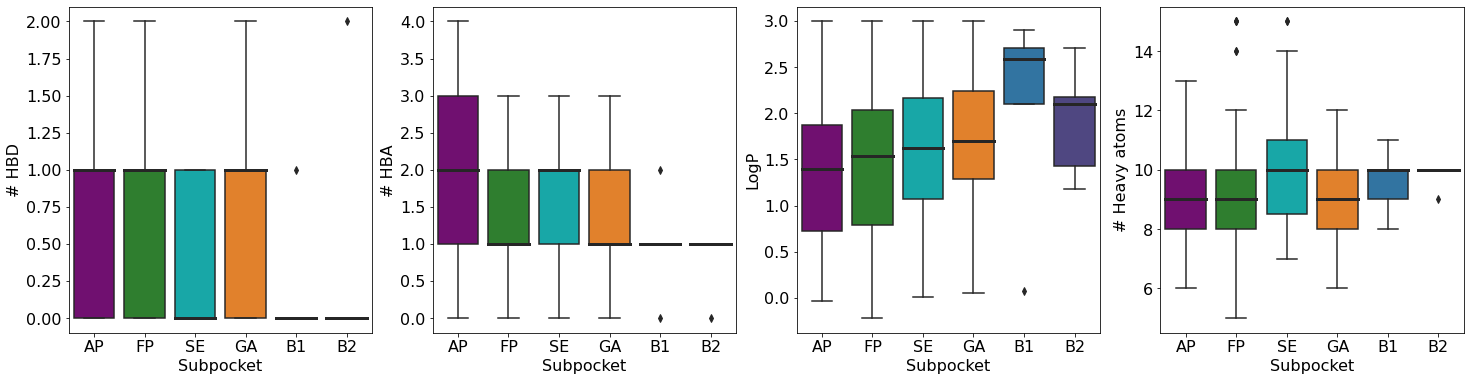

In [48]:
descriptors = filters.analysis.get_descriptors_filters(fragment_library_filter_res, bool_keys)

## 7. Development of number of fragments per subpocket during custom filtering

Inspect the number of fragments filtered out by each custom filtering step

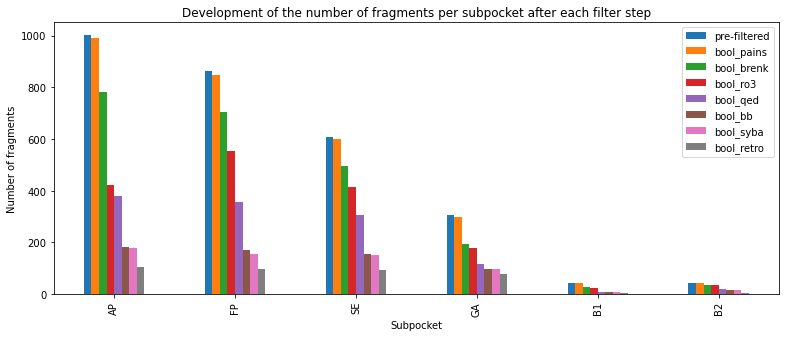

In [49]:
update_results = filters.plots.num_frags_development(filter_results)

In [50]:
update_results

,pre-filtered,bool_pains,bool_brenk,bool_ro3,bool_qed,bool_bb,bool_syba,bool_retro
AP,1001,990,781,422,379,181,179,107
FP,864,847,704,552,357,172,156,97
SE,607,599,495,414,308,154,150,95
GA,306,300,195,179,116,98,96,79
B1,42,42,26,23,10,8,8,5
B2,42,42,36,35,19,18,18,5
